# Lead Scoring  with Logistic Regression
<br></br>

<img src='image.jpg'>

### Problem Statement
 X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


### Business Goal

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Imports

In [1]:
import pandas as pd
import numpy as np

#for spliting the data 
from sklearn.model_selection import train_test_split

#for mutual information score 
from sklearn.metrics import mutual_info_score

#for model evaluataion
from sklearn.metrics import accuracy_score

#for vectorizing the data 
from sklearn.feature_extraction import DictVectorizer

#for model building
from sklearn.linear_model import LogisticRegression

#for ploting
import matplotlib.pyplot as plt

# 1 Logistic Regression
Logistic regression is a linear model used in binary classification tasks where the target variable can take only 2 values such 0 or 1. Given a set of features the model predict the porability that  the target variable will take the value 1. The probabilty is computed using the logistic function. The it is compared to a threshold (0.5 usually), and if the probability is  greater than the threshold the target variable is classified as 1, Otherwise it is 0.
In terms of mathematical terms the logistic regression is has the following form:
$$g(X)=\sigma(W.X+b)$$
where:

- $\mathbf{X}$ :the input feautre vector
- $\mathbf{W}$: the Weights vector
- $\mathbf{b}$: the bias term
- $\mathbf{\sigma}$: the sigmoid function

$\mathbf{W}$ the  weight vector and $\mathbf{b}$ the bias term are the **parameters** of the model.They are updated during the training.By optimizing these parameters the model is able to make good predictions on new data.

For the implementation of the model, sklearn package is used.



# 2 Data Preparation

### 2.1 Load  data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2.2 Assesing Data

### 2.2.1 lowercase the columns name  and remove the spaces 

In [5]:
#lowerCase the columns names 
df.columns = df.columns.str.lower().str.replace(' ','_')

#select columns with string values 
string_columns= list(df.dtypes[df.dtypes==object].index)

#Lowercases and replaces spaces with underscoresfor values in all string columns of the DataFrame 
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

### 2.2.2 Handling missing vlaues

In [6]:
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [7]:
categorical=['lead_origin','lead_source','do_not_email','do_not_call'
             ,'last_activity','country','specialization', 'how_did_you_hear_about_x_education',
             'what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course','search',
            'magazine','newspaper_article','digital_advertisement', 'through_recommendations','receive_more_updates_about_our_courses',
            'tags', 'lead_quality','update_me_on_supply_chain_content','lead_profile','city',
            'asymmetrique_activity_index','asymmetrique_profile_index', 'i_agree_to_pay_the_amount_through_cheque',
            'a_free_copy_of_mastering_the_interview','last_notable_activity']
numerical=['totalvisits','total_time_spent_on_website','page_views_per_visit','asymmetrique_activity_score','asymmetrique_profile_score']

In [8]:

for cat in categorical:
    df[cat]= df[cat].fillna(df[cat].mode()[0])
for num in numerical :
    df[num]= df[num].fillna(df[num].mean())

## 2.3 Feature importance

> ### 2.3.1 Mutual information score(dependency between categorical variables)
> **Mutual information** is used with categorical variables  to tell how much 2 variables are dependent . we will use it to measure how the variables are dependent to the target variable if one variable is dependent to the target variable then it's important to the prediction otherwise it's not important for the prediction and we can  safetly drop it form the dataset.it measures non linear relations.

In [9]:
def calculate_mi(series):
    return mutual_info_score(series,df.converted)

In [10]:
df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
df_mi

,MI
tags,0.206630
lead_quality,0.107821
last_activity,0.084493
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
lead_origin,0.056251
what_is_your_current_occupation,0.053389
specialization,0.014624
city,0.012024


## Observation :  we see the least important featrues are  
- how_did_you_hear_about_x_education
- a_free_copy_of_mastering_the_interview
- do_not_call
- through_recommendations
- what_matters_most_to_you_in_choosing_a_course
- digital_advertisement
- newspaper_article
- search
- receive_more_updates_about_our_courses
- update_me_on_supply_chain_content
- magazine
- i_agree_to_pay_the_amount_through_cheque

#### <br></br>We drop these features which are the least important

In [11]:
df.drop(['do_not_call',
'through_recommendations',
'what_matters_most_to_you_in_choosing_a_course',
'digital_advertisement',
'newspaper_article',
'search',
'receive_more_updates_about_our_courses',
'update_me_on_supply_chain_content',
'magazine',
'i_agree_to_pay_the_amount_through_cheque'],axis=1,inplace=True

)

In [12]:
df.shape[1]

27

> ### 2.3.2 Correlation Coefficient( linear relationship between variables and the target variables)

In [13]:
df[numerical].corrwith(df.converted)

totalvisits                    0.030091
total_time_spent_on_website    0.362483
page_views_per_visit          -0.003294
asymmetrique_activity_score    0.123491
asymmetrique_profile_score     0.160700
dtype: float64

### Observation:we have low correlation coefficient for all the variables this mean we have low<bold> *linear relationship*</bold> but this doesn't mean there is no other type of realtionship between the variables and the target variable<br></br>

In [14]:
new_categorical =['lead_origin','lead_source','do_not_email'
             ,'last_activity','country','specialization', 'how_did_you_hear_about_x_education',
             'what_is_your_current_occupation',
            'tags', 'lead_quality','lead_profile','city',
            'asymmetrique_activity_index','asymmetrique_profile_index',
            'a_free_copy_of_mastering_the_interview','last_notable_activity']

## 2.4 Spliting  data 
For data slitting we use:

- (~ 10%)  in validation set
- (~ 10%) users in testing set
- (~ 80%) in training set

In [15]:
df_train_full, df_test= train_test_split(df,test_size=0.2,random_state=1)

df_train, df_val= train_test_split(df_train_full,test_size=0.33, random_state=11)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [16]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## 2.5 FEATURE ENGINEERING

>### one hot Encoding

In [17]:
train_dic = df_train[new_categorical+ numerical].to_dict(orient='records')
train_dic

[{'lead_origin': 'lead_add_form',
  'lead_source': 'reference',
  'do_not_email': 'no',
  'last_activity': 'email_opened',
  'country': 'india',
  'specialization': 'media_and_advertising',
  'how_did_you_hear_about_x_education': 'select',
  'what_is_your_current_occupation': 'unemployed',
  'tags': 'want_to_take_admission_but_has_financial_problems',
  'lead_quality': 'low_in_relevance',
  'lead_profile': 'potential_lead',
  'city': 'mumbai',
  'asymmetrique_activity_index': '02.medium',
  'asymmetrique_profile_index': '02.medium',
  'a_free_copy_of_mastering_the_interview': 'no',
  'last_notable_activity': 'email_opened',
  'totalvisits': 0.0,
  'total_time_spent_on_website': 0,
  'page_views_per_visit': 0.0,
  'asymmetrique_activity_score': 14.306252489048187,
  'asymmetrique_profile_score': 16.344882516925527},
 {'lead_origin': 'landing_page_submission',
  'lead_source': 'direct_traffic',
  'do_not_email': 'yes',
  'last_activity': 'sms_sent',
  'country': 'india',
  'specializatio

In [18]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dic)

DictVectorizer(sparse=False)

In [19]:
X_train = dv.transform(train_dic)

In [20]:
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
       14.30625249,  0.        ,  1.        ,  0.        , 16.34488252,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.  

# 3 Training Logistic Regression Model

#### Training  Logistic Regression

In [21]:
model = LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

#### Apply the model on the validation set

In [22]:
val_dic = df_val[new_categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dic)

In [23]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([3.00788495e-04, 9.39580257e-01, 9.38181471e-01, ...,
       4.01687715e-01, 3.82944959e-01, 3.24012563e-03])

In [24]:
converted = y_pred>0.5

# 4 Evaluation Logistic Regression

#### Accuracy

In [25]:
accuracy = (y_val==converted).mean()
print("accuracy: ", accuracy)

accuracy:  0.9254098360655738


### Confusion Matrix

In [26]:
t = 0.5
predict_converted = (y_pred >= t)
predict_no_converted= (y_pred < t)

actual_converted = (y_val == 1)
actual_no_converted = (y_val == 0)

true_positive = (predict_converted & actual_converted).sum()
false_positive = (predict_converted & actual_no_converted).sum()
false_negative = (predict_no_converted & actual_converted).sum()
true_negative = (predict_no_converted & actual_no_converted).sum()

In [27]:
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])
confusion_table

array([[1410,   90],
       [  92,  848]])

In [28]:
confusion_table / confusion_table.sum()*100

array([[57.78688525,  3.68852459],
       [ 3.7704918 , 34.75409836]])

### Precision:


In [29]:
P = true_positive/(false_positive+true_positive)
P

0.9040511727078892

#### observation: a high value of precision means that among all the positive we have many are  True positive meaning that we have a low False positive rate 

### REcall

In [30]:
R =  true_positive/ (true_positive + false_negative)
R

0.902127659574468

#### observation:a high value of recall meaning that the model predict most of true positive <br></br>we catched most of the people that are converting (meaning we have a low false negative rate)

### ROC

In [31]:
FPR = false_positive/(false_positive+true_negative)
print('False Positive Rate= ',FPR*100,'%')

False Positive Rate=  6.0 %


In [32]:
TPR = true_positive / (true_positive + false_negative)
print('True Positive Rate= ',TPR*100,'%')

True Positive Rate=  90.2127659574468 %


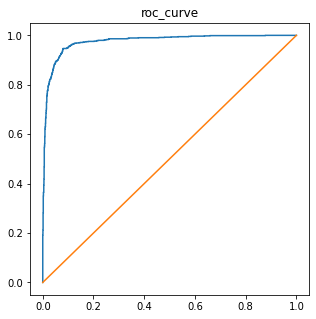

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.title("roc_curve")
plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1])

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.9752634751773049

# 5 Predictions( test dataset )

In [35]:
test_dic = df_test[new_categorical+numerical].to_dict(orient='records')
X_test = dv.transform(test_dic)

In [36]:
X_test[0]

array([ 1.,  0.,  0.,  1.,  0., 14.,  0.,  1.,  0., 16.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [37]:
preds_test = model.predict_proba(X_test)[:,1]
preds_test=preds_test>0.5

#### Accuracy for Test

In [38]:
accuracy_test=(preds_test==y_test).mean()
print('accuracy for test: ',accuracy_test)

accuracy for test:  0.9231601731601732


#### Observation: the accuracy for the test data set is great , our model is not overfiting ,it's doing great